In [313]:
import matplotlib.pyplot as plt
import sympy
from  sympy import  Symbol
# from sympy.abc import s, t, c, m, k
from math import e, sqrt
sympy.init_printing()

In [314]:
#simbolos
t, s, a = sympy.symbols('t, s, a')
m = sympy.symbols('m', real=True, positive=True)
c = sympy.symbols('c', real=True, positive=True)
k = sympy.symbols('k', real=True, positive=True)
alfa = sympy.symbols('alfa', real=True, positive=True)
omega = sympy.symbols('omega')
f_zero = sympy.symbols('f_zero', real=True, positive=True)
y = sympy.Function('y')

In [315]:
##definição da expressão( EDO)
f = m * y(t).diff(t).diff(t) + c * y(t).diff(t) + k* y(t)
F = sympy.laplace_transform(f, t, s, noconds=True)

In [316]:
#transformada
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

In [317]:
#transformada inversa
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [318]:
#função unitaria e expressão( EDO)
u = sympy.Function('u')
u = 1


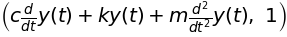

In [319]:
#transformada Laplace separadas (EDO)
f,u

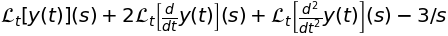

In [320]:
#valores para o calculo
Y = (L(f) - f_zero/s)
Y.subs({c: 2, f_zero: 3, k: 1, m: 1})



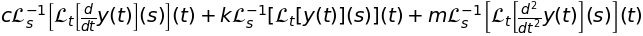

In [321]:
#transformação inversa (EDO)
invL(F)

In [322]:
#alfa
alfa = -c/2*m



In [323]:
#omega
omega = ((alfa**2) - (k/m))**(1/2)


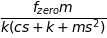

In [341]:
#expressão transformada Laplace t0
Y =  sympy.Function('Y')
Y = f_zero*m / (k* (m * s**2 + c * s + k))
Y

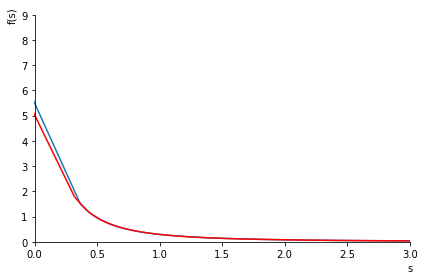

In [356]:
#plotagem transformada

p = sympy.plot(Y.subs({m: 50, c: 4, k: 3, f_zero: 1}), Y.subs({m: 50, c: 4, k: 3, f_zero: 1}),
               xlim=(-0.001, 3), ylim=(0, 9), show=False)
p[1].line_color = 'red'

p.show()

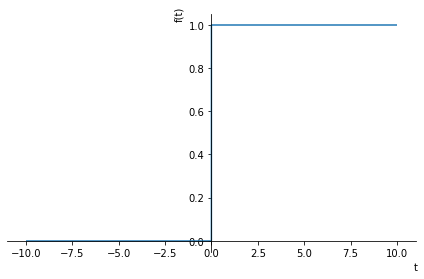

In [357]:
#unit step function
sympy.Heaviside(t)
sympy.plot(sympy.Heaviside(t))

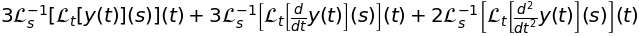

In [358]:
#inversa
invL(F).subs({m: 2, c: 3, k: 3, f_zero: 2})

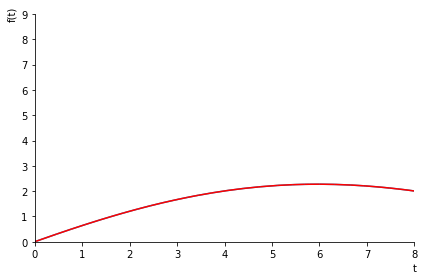

In [362]:
#plotagem transformada inversa
p = sympy.plot(invL(Y).subs({m: 50, c: 3, k: 3, f_zero: 2}), invL(Y).subs({m: 50, c: 3, k: 3, f_zero: 2}),
               xlim=(0, 8), ylim=(0, 9), show=False)
p[1].line_color = 'red'
p.show()

In [330]:
#funções tabela
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

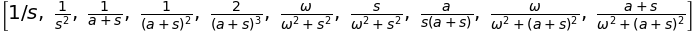

In [331]:
#tabela
Fs = [L(f) for f in functions]
Fs

In [334]:
from pandas import DataFrame
def makelatex(args):
    return ["$${}$$".format(sympy.latex(a)) for a in args]

In [333]:
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))

,0,1
0,$$1$$,$$\frac{1}{s}$$
1,$$t$$,$$\frac{1}{s^{2}}$$
2,$$e^{- a t}$$,$$\frac{1}{a + s}$$
3,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
4,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
5,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
6,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$
7,$$1 - e^{- a t}$$,$$\frac{a}{s \left(a + s\right)}$$
8,$$e^{- a t} \sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + \left(a + s\right...
9,$$e^{- a t} \cos{\left(\omega t \right)}$$,$$\frac{a + s}{\omega^{2} + \left(a + s\right)...
